**Background**

We are first evaluating the closing price variation trends of the following companies over the last 12 months: ciSparc Ltd. (SPRC),  Oncolytics Biotech Inc. (ONCY),  XBiotech Inc. (XBIT),  Novocure Ltd. (NVCR), and Purple Biotech Ltd. (PPBT). All of these companies are invovlved in therapeutics for pancreatic cancer.

In [2]:
!pip install yfinance


[*********************100%***********************]  5 of 5 completed


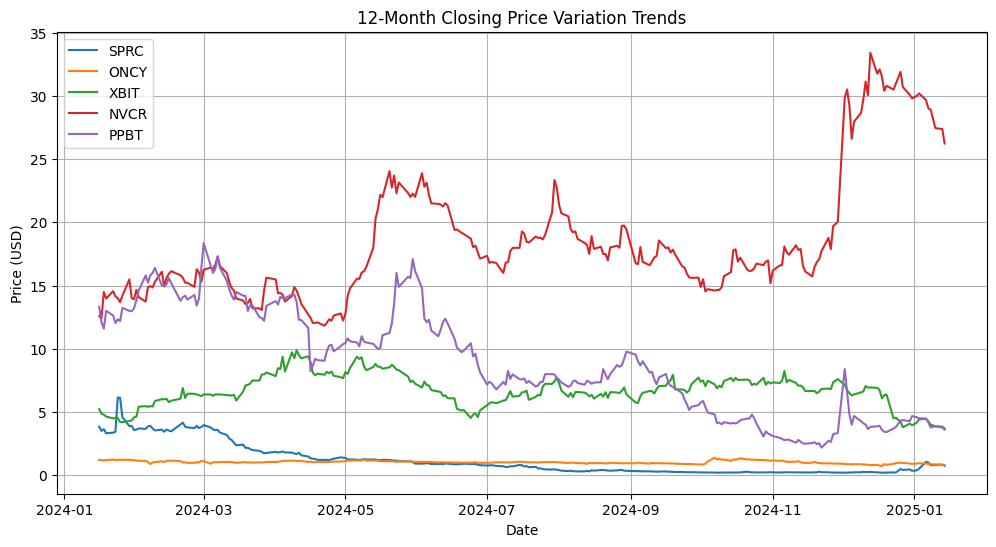

In [3]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

tickers = ["SPRC", "ONCY", "XBIT", "NVCR", "PPBT"]

data = yf.download(tickers, period="1y", interval="1d")

close_prices = data['Close']

plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(close_prices.index, close_prices[ticker], label=ticker)

plt.title("12-Month Closing Price Variation Trends")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()


Now, we will compare these stocks to the NASDAQ Biotechnology Index (NBI) to see which one has the most similar variance.

[*********************100%***********************]  6 of 6 completed


Variance of Daily Returns (last 12 months):
        Variance  DifferenceFromNBI
Ticker                             
ONCY    0.001951           0.001829
NVCR    0.002909           0.002787
XBIT    0.002918           0.002796
PPBT    0.014068           0.013946
SPRC    0.017932           0.017810

NASDAQ Biotechnology Index (^NBI) daily returns variance: 0.00012201502846205593

The ticker with the most similar variance to ^NBI is: ONCY


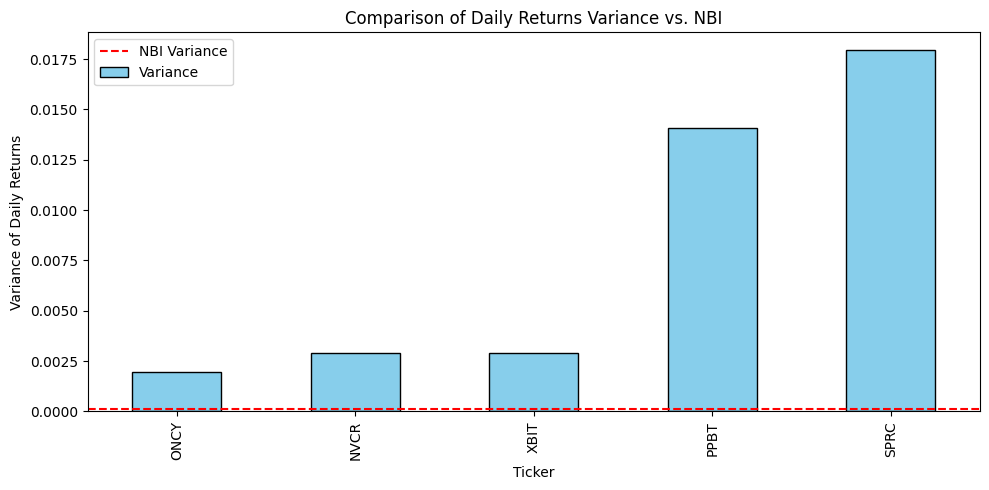

In [4]:
index_ticker = ["^NBI"]

all_tickers = tickers + index_ticker

data = yf.download(all_tickers, period="1y", interval="1d")

close_prices = data["Close"]

daily_returns = close_prices.pct_change().dropna()
variances = daily_returns.var()
nbi_variance = variances["^NBI"]

# comparative dataFrame for variance
comparison_df = pd.DataFrame({
    "Variance": variances.drop("^NBI"),
    "DifferenceFromNBI": abs(variances.drop("^NBI") - nbi_variance)
}).sort_values("DifferenceFromNBI")

print("Variance of Daily Returns (last 12 months):")
print(comparison_df)

print("\nNASDAQ Biotechnology Index (^NBI) daily returns variance:", nbi_variance)

most_similar_ticker = comparison_df.index[0]
print(f"\nThe ticker with the most similar variance to ^NBI is: {most_similar_ticker}")

plt.figure(figsize=(10, 5))
comparison_df["Variance"].plot(
    kind="bar",
    color="skyblue",
    edgecolor="black"
)
plt.axhline(y=nbi_variance, color='red', linestyle='--', label='NBI Variance')
plt.title("Comparison of Daily Returns Variance vs. NBI")
plt.xlabel("Ticker")
plt.ylabel("Variance of Daily Returns")
plt.legend()
plt.tight_layout()
plt.show()

Now, we will build an index of the 5 original stocks and compare that index to the performance of the Nasdaq Biotechnology Index (NBI).

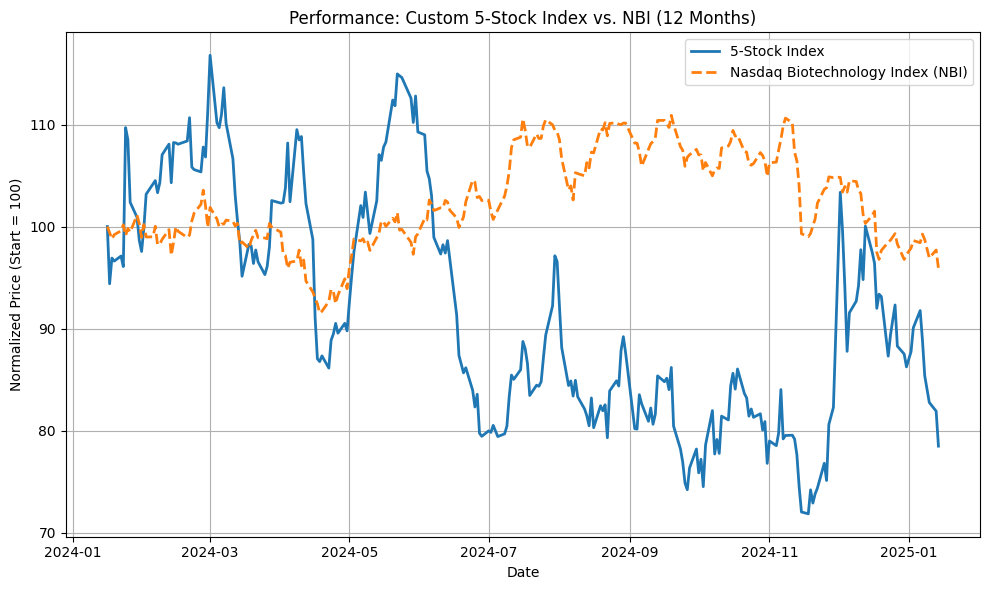

Final values on the last available date:
            CustomIndex        NBI
Date                              
2025-01-14    78.476445  95.900632


In [10]:
mini_index = pd.DataFrame()

close_prices = close_prices.dropna()
normalized_stocks = close_prices[tickers].div(close_prices[tickers].iloc[0])
mini_index["CustomIndex"] = normalized_stocks.mean(axis=1) * 100

nbi_data = close_prices[index_ticker].dropna()
nbi_normalized = (nbi_data / nbi_data.iloc[0]) * 100
mini_index["NBI"] = nbi_normalized

plt.figure(figsize=(10, 6))
plt.plot(mini_index["CustomIndex"], label="5-Stock Index", linewidth=2)
plt.plot(mini_index["NBI"], label="Nasdaq Biotechnology Index (NBI)", linewidth=2, linestyle="--")

plt.title("Performance: Custom 5-Stock Index vs. NBI (12 Months)")
plt.xlabel("Date")
plt.ylabel("Normalized Price (Start = 100)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Final values on the last available date:")
print(mini_index.tail(1))

Now we will analyze the peak and trough matching of these two indeces.

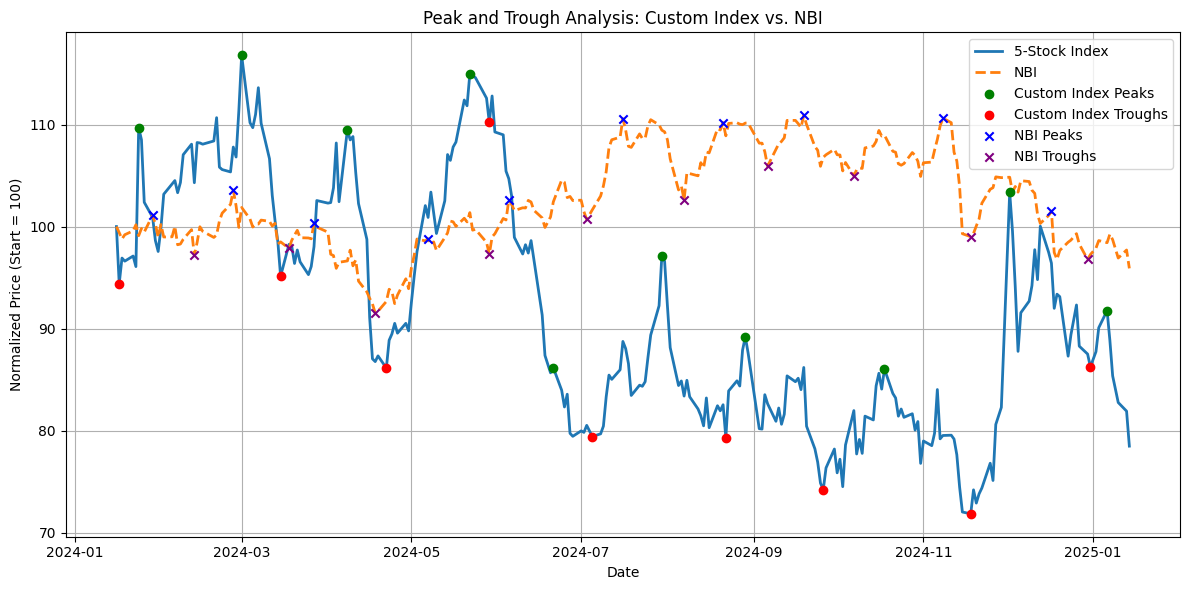

Peaks Comparison:
         Date  CustomIndex Peak    NBI Peak
0  2024-01-24        109.700385         NaN
1  2024-01-29               NaN  101.118392
2  2024-02-27               NaN  103.565681
3  2024-03-01        116.793222         NaN
4  2024-03-27               NaN  100.310899
5  2024-04-08        109.501733         NaN
6  2024-05-07               NaN   98.805792
7  2024-05-22        114.966320         NaN
8  2024-06-05               NaN  102.602744
9  2024-06-21         86.161111         NaN
10 2024-07-16               NaN  110.569824
11 2024-07-30         97.137563         NaN
12 2024-08-21               NaN  110.183781
13 2024-08-29         89.205291         NaN
14 2024-09-19               NaN  110.903285
15 2024-10-18         86.038272         NaN
16 2024-11-08               NaN  110.631638
17 2024-12-02        103.356192         NaN
18 2024-12-17               NaN  101.506010
19 2025-01-06         91.762081         NaN

Troughs Comparison:
         Date  CustomIndex Trough  NB

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

custom_index = mini_index["CustomIndex"]
nbi_index = mini_index["NBI"]

peaks_custom, _ = find_peaks(custom_index, distance=20)
troughs_custom, _ = find_peaks(-custom_index, distance=20)

peaks_nbi, _ = find_peaks(nbi_index, distance=20)
troughs_nbi, _ = find_peaks(-nbi_index, distance=20)

peaks_custom_values = custom_index.iloc[peaks_custom]
troughs_custom_values = custom_index.iloc[troughs_custom]
peaks_nbi_values = nbi_index.iloc[peaks_nbi]
troughs_nbi_values = nbi_index.iloc[troughs_nbi]

plt.figure(figsize=(12, 6))

plt.plot(custom_index.index, custom_index, label="5-Stock Index", linewidth=2)
plt.plot(nbi_index.index, nbi_index, label="NBI", linewidth=2, linestyle="--")

plt.scatter(custom_index.index[peaks_custom], peaks_custom_values,
            color="green", label="Custom Index Peaks", zorder=5)
plt.scatter(custom_index.index[troughs_custom], troughs_custom_values,
            color="red", label="Custom Index Troughs", zorder=5)
plt.scatter(nbi_index.index[peaks_nbi], peaks_nbi_values,
            color="blue", label="NBI Peaks", marker="x", zorder=5)
plt.scatter(nbi_index.index[troughs_nbi], troughs_nbi_values,
            color="purple", label="NBI Troughs", marker="x", zorder=5)

plt.title("Peak and Trough Analysis: Custom Index vs. NBI")
plt.xlabel("Date")
plt.ylabel("Normalized Price (Start = 100)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

custom_peaks_df = pd.DataFrame({
    "Date": custom_index.index[peaks_custom],
    "CustomIndex Peak": peaks_custom_values
}).reset_index(drop=True)

custom_troughs_df = pd.DataFrame({
    "Date": custom_index.index[troughs_custom],
    "CustomIndex Trough": troughs_custom_values
}).reset_index(drop=True)

nbi_peaks_df = pd.DataFrame({
    "Date": nbi_index.index[peaks_nbi],
    "NBI Peak": peaks_nbi_values
}).reset_index(drop=True)

nbi_troughs_df = pd.DataFrame({
    "Date": nbi_index.index[troughs_nbi],
    "NBI Trough": troughs_nbi_values
}).reset_index(drop=True)

peaks_comparison = pd.merge(custom_peaks_df, nbi_peaks_df, on="Date", how="outer")
troughs_comparison = pd.merge(custom_troughs_df, nbi_troughs_df, on="Date", how="outer")

print("Peaks Comparison:")
print(peaks_comparison)

print("\nTroughs Comparison:")
print(troughs_comparison)


Next, we will use Meta's Prophet for predicting our index's trajectory for the next 90 days.

In [27]:
!pip install prophet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from prophet import Prophet

In [28]:
df = mini_index.copy()

df.sort_index(inplace=True)


df_prophet = df[['CustomIndex']].reset_index()
df_prophet.columns = ['ds', 'y']

df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

print(df_prophet.head())

          ds           y
0 2024-01-16  100.000000
1 2024-01-17   94.391798
2 2024-01-18   96.913551
3 2024-01-19   96.610480
4 2024-01-22   97.110440


In [30]:
# initiating prophet model
m = Prophet(
    yearly_seasonality= True,
    weekly_seasonality= True,
    daily_seasonality=False,
    )

m.fit(df_prophet)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfnmzxsm7/ln0meby5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfnmzxsm7/wbkl27th.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73286', 'data', 'file=/tmp/tmpfnmzxsm7/ln0meby5.json', 'init=/tmp/tmpfnmzxsm7/wbkl27th.json', 'output', 'file=/tmp/tmpfnmzxsm7/prophet_modelduukayv9/prophet_model-20250114232351.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:23:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:23:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [31]:
future = m.make_future_dataframe(periods=90, freq='D')
forecast = m.predict(future)

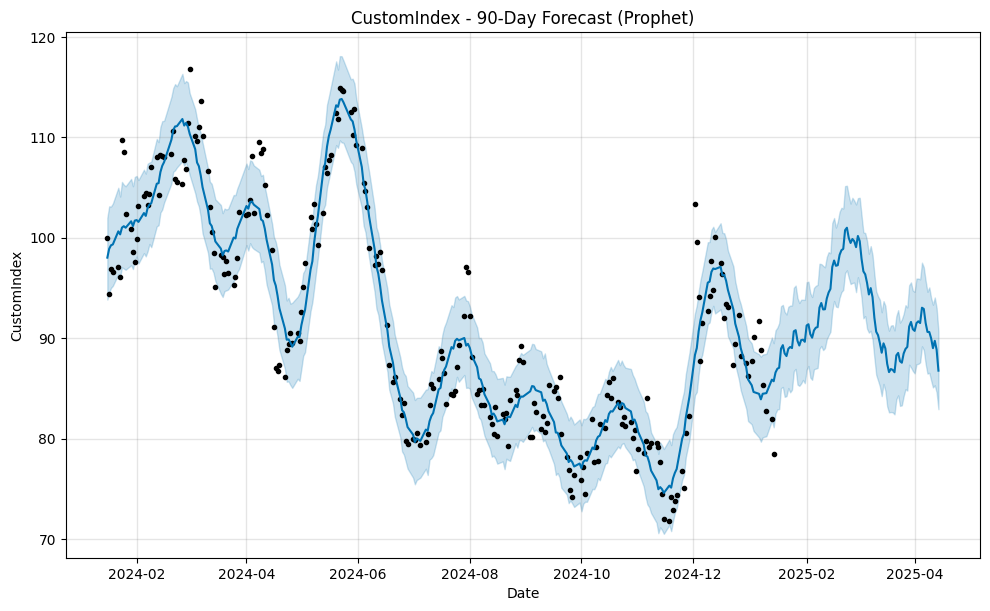

In [33]:
fig1 = m.plot(forecast)
plt.title("CustomIndex - 90-Day Forecast (Prophet)")
plt.xlabel("Date")
plt.ylabel("CustomIndex")
plt.show()

Now, we will add NBI as a regressor and project another 90 day forecast.

In [34]:
df = mini_index.copy()

df.sort_index(inplace=True)

df_prophet = df[['NBI', 'CustomIndex']].reset_index()
df_prophet.columns = ['ds', 'NBI', 'y']

df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

print("First few rows of Prophet DataFrame:")
print(df_prophet.head())

First few rows of Prophet DataFrame:
          ds         NBI           y
0 2024-01-16  100.000000  100.000000
1 2024-01-17   99.408872   94.391798
2 2024-01-18   98.782778   96.913551
3 2024-01-19   99.199491   96.610480
4 2024-01-22   99.582824   97.110440


In [35]:
m = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False
)

# external regressor "NBI"
m.add_regressor('NBI')

m.fit(df_prophet)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfnmzxsm7/3sxjczep.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfnmzxsm7/twihrp3z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80093', 'data', 'file=/tmp/tmpfnmzxsm7/3sxjczep.json', 'init=/tmp/tmpfnmzxsm7/twihrp3z.json', 'output', 'file=/tmp/tmpfnmzxsm7/prophet_model6ot8r1zc/prophet_model-20250114232716.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:27:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:27:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [36]:
future_periods = 90
future = m.make_future_dataframe(periods=future_periods, freq='D')

last_nbi = df_prophet['NBI'].iloc[-1]

future = future.merge(df_prophet[['ds','NBI']], on='ds', how='left')
future['NBI'].fillna(last_nbi, inplace=True)

<ipython-input-36-e61d25031985>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  future['NBI'].fillna(last_nbi, inplace=True)


In [37]:
forecast = m.predict(future)
print("\nForecast columns:")
print(forecast.columns)


Forecast columns:
Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'NBI', 'NBI_lower', 'NBI_upper', 'additive_terms',
       'additive_terms_lower', 'additive_terms_upper',
       'extra_regressors_additive', 'extra_regressors_additive_lower',
       'extra_regressors_additive_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')


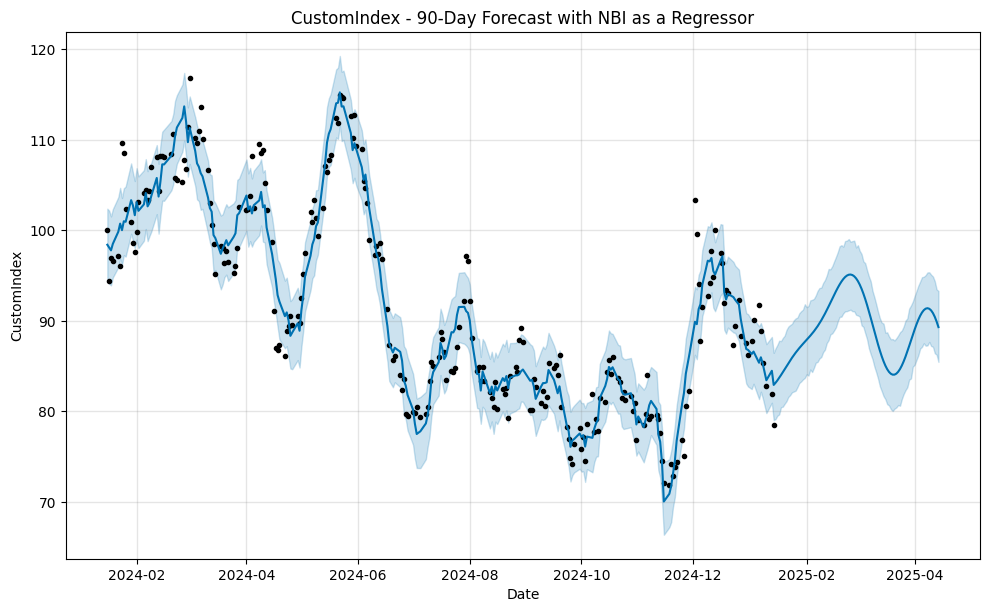

In [38]:
fig1 = m.plot(forecast)
plt.title("CustomIndex - 90-Day Forecast with NBI as a Regressor")
plt.xlabel("Date")
plt.ylabel("CustomIndex")
plt.show()